__Data Source__ : https://catalog.data.gov/dataset/fatal-crashes

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
cols = [
    "objectid",
    "year",
    "district",
    "date_",
    "primary_st",
    "age",
    "sex",
    "crash_type",
    "hit_____ru",
    "veh1",
    "veh2",
    "arrest_yes",
    "investigat",
    "time_of_day__24hrs_",
    "lat",
    "lng",
]

In [3]:
df = pd.read_csv("./fatal_crashes.csv", usecols=cols)
column_mapping = {
    "objectid": "crash_id",
    "district": "police_district",
    "date_": "crash_date",
    "primary_st": "primary_street",
    "sex": "victim_gender",
    "crash_type": "collision_type",
    "hit_____ru": "hit_and_run",
    "veh1": "primary_vehicle",
    "veh2": "secondary_vehicle",
    "arrest_yes": "arrest_made",
    "investigat": "investigation_status",
    "time_of_day__24hrs_": "time",
    "lat": "latitude",
    "lng": "longitude",
}

df = df.rename(columns=column_mapping)

In [4]:
df.sample(3)

,crash_id,year,police_district,crash_date,primary_street,age,victim_gender,collision_type,hit_and_run,primary_vehicle,secondary_vehicle,arrest_made,investigation_status,time,latitude,longitude
268,48182,2021,25,2021-03-14 05:00:00+00,Broad St.,61.0,F,Pedestrian was crossing Broad St. at Lehigh Av...,No,Auto,Pedestrian,Yes,"Homicide by vehicle, Inv. Mans. REAP,",NaN,NaN,NaN
733,48644,2024,8,2024-09-14 04:00:00+00,Leon St.,50.0,M,Unit #1 was traveling north on Leon St. at a h...,No,Auto,Auto,No,The deceased was the cause of the crash.,09:30:00,40.045454,-75.024170
221,48135,2020,35,2020-11-12 05:00:00+00,Belfield Ave.,69.0,F,Pedestrian was attempting to cross Louden St. ...,Yes,Auto,Pedestrian,Pending,Pending ID of operator.,NaN,40.026574,-75.150783


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   crash_id              796 non-null    int64  
 1   year                  796 non-null    int64  
 2   police_district       796 non-null    int64  
 3   crash_date            796 non-null    object 
 4   primary_street        796 non-null    object 
 5   age                   791 non-null    float64
 6   victim_gender         795 non-null    object 
 7   collision_type        796 non-null    object 
 8   hit_and_run           796 non-null    object 
 9   primary_vehicle       796 non-null    object 
 10  secondary_vehicle     793 non-null    object 
 11  arrest_made           780 non-null    object 
 12  investigation_status  792 non-null    object 
 13  time                  291 non-null    object 
 14  latitude              782 non-null    float64
 15  longitude             7

In [6]:
df.isnull().sum()

crash_id                  0
year                      0
police_district           0
crash_date                0
primary_street            0
age                       5
victim_gender             1
collision_type            0
hit_and_run               0
primary_vehicle           0
secondary_vehicle         3
arrest_made              16
investigation_status      4
time                    505
latitude                 14
longitude                14
dtype: int64

In [7]:
df.describe()

,crash_id,year,police_district,age,latitude,longitude
count,796.000000,796.000000,796.000000,791.000000,782.000000,782.000000
mean,48311.500000,2021.708543,18.410804,43.342604,40.011418,-75.156395
std,229.929699,1.746292,10.887109,18.776303,0.145467,0.338102
min,47914.000000,2019.000000,1.000000,0.000000,39.884438,-80.502372
25%,48112.750000,2020.000000,9.000000,29.000000,39.974932,-75.179845
50%,48311.500000,2022.000000,17.000000,40.000000,40.005547,-75.144203
75%,48510.250000,2023.000000,25.000000,58.000000,40.033044,-75.097381
max,48709.000000,2025.000000,77.000000,99.000000,42.224336,-74.961302


In [8]:
df["crash_date"] = df["crash_date"].str.split().str[0]
df["crash_date"] = pd.to_datetime(df["crash_date"])
df.sample(3)

,crash_id,year,police_district,crash_date,primary_street,age,victim_gender,collision_type,hit_and_run,primary_vehicle,secondary_vehicle,arrest_made,investigation_status,time,latitude,longitude
385,48299,2022,22,2022-01-13,Broad St.,24.0,M,Unit #1 N/B on Broad St. fleeing police and di...,No,Auto,Auto,Yes,"HBV. Inv. Mans. Murder, K & I, VUFA",NaN,39.974492,-75.158785
625,48537,2023,12,2023-11-29,7800 Bartram Ave.,51.0,M,Unit #1 was southbound on Bartram Ave when it ...,No,Auto,Fixed Object,No,No crime involved in this crash,05:49:00,39.894555,-75.229540
733,48644,2024,8,2024-09-14,Leon St.,50.0,M,Unit #1 was traveling north on Leon St. at a h...,No,Auto,Auto,No,The deceased was the cause of the crash.,09:30:00,40.045454,-75.024170


In [9]:
df.insert(
    loc=df.columns.get_loc("crash_date") + 1,
    column="day_name",
    value=df["crash_date"].dt.day_name(),
)

In [10]:
df.dtypes

crash_id                         int64
year                             int64
police_district                  int64
crash_date              datetime64[ns]
day_name                        object
primary_street                  object
age                            float64
victim_gender                   object
collision_type                  object
hit_and_run                     object
primary_vehicle                 object
secondary_vehicle               object
arrest_made                     object
investigation_status            object
time                            object
latitude                       float64
longitude                      float64
dtype: object

In [11]:
dtypes_dict = {
    "crash_id": "int64",
    "year": "int64",
    "police_district": "int64",
    "crash_date": "datetime64[ns]",
    "day_name": "object",
    "primary_street": "object",
    "age": "float64",
    "victim_gender": "object",
    "collision_type": "object",
    "hit_and_run": "object",
    "primary_vehicle": "object",
    "secondary_vehicle": "object",
    "arrest_made": "object",
    "investigation_status": "object",
    "time": "object",
    "latitude": "float64",
    "longitude": "float64",
}

In [12]:
df = df.astype(dtypes_dict)

In [13]:
df["hit_and_run"].unique()

array(['No', 'Yes', 'Unk', '??'], dtype=object)

In [14]:
df["hit_and_run"] = np.where(
    df["hit_and_run"] == "Yes", 1, np.where(df["hit_and_run"] == "No", 0, np.nan)
)

In [15]:
df["hit_and_run"].unique()

array([ 0.,  1., nan])

In [16]:
df["arrest_made"].unique()

array(['Yes', 'No', nan, 'Pending', 'Pending ID', 'Unk.', 'TBD',
       'Arrested', 'None expected', 'N', 'No '], dtype=object)

In [17]:
df["arrest_made"].value_counts()

arrest_made
No               549
Pending          147
Yes               73
No                 4
TBD                2
Pending ID         1
Unk.               1
Arrested           1
None expected      1
N                  1
Name: count, dtype: int64

In [18]:
df.dtypes

crash_id                         int64
year                             int64
police_district                  int64
crash_date              datetime64[ns]
day_name                        object
primary_street                  object
age                            float64
victim_gender                   object
collision_type                  object
hit_and_run                    float64
primary_vehicle                 object
secondary_vehicle               object
arrest_made                     object
investigation_status            object
time                            object
latitude                       float64
longitude                      float64
dtype: object

In [19]:
acc_by_year = df["year"].value_counts().rename("count").reset_index()
acc_by_year

,year,count
0,2020,156
1,2024,134
2,2021,133
3,2023,128
4,2022,126
5,2019,90
6,2025,29


In [20]:
type(acc_by_year)

pandas.core.frame.DataFrame

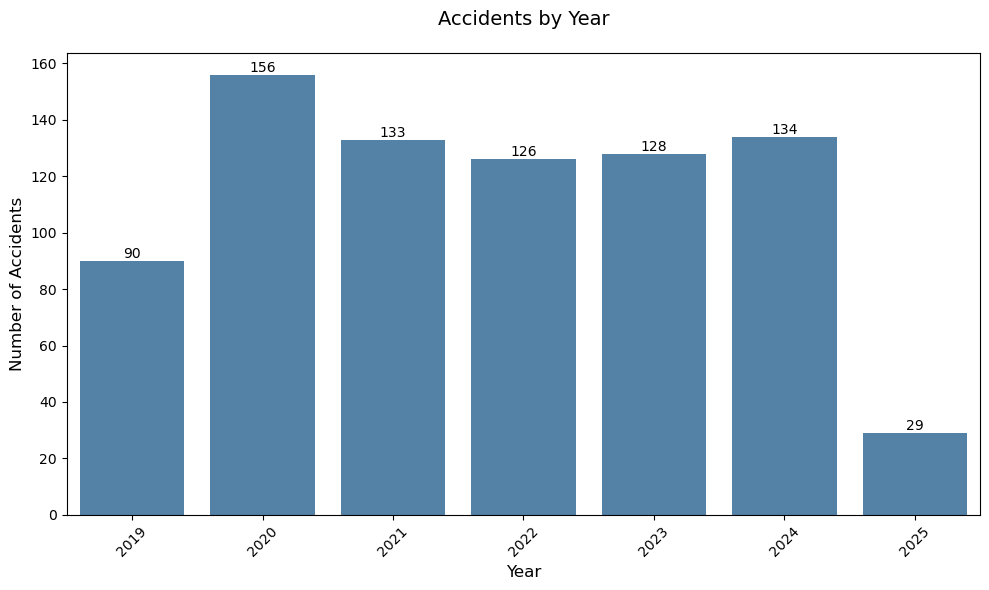

In [21]:
plt.figure(figsize=(10, 6))


bar_plot = sns.barplot(
    data=acc_by_year,
    x="year",
    y="count",
    color="steelblue",
    order=sorted(acc_by_year["year"]),
)


plt.title("Accidents by Year", fontsize=14, pad=20)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.xticks(rotation=45)

for p in bar_plot.patches:
    bar_plot.annotate(
        format(p.get_height(), ".0f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 5),
        textcoords="offset points",
        fontsize=10,
    )


plt.tight_layout()
plt.show()

In [22]:
acc_by_police_dist = df["police_district"].value_counts().rename("count").reset_index()

In [23]:
acc_by_police_dist

,police_district,count
0,25,85
1,15,84
2,24,70
3,39,64
4,35,52
5,12,49
6,2,46
7,8,42
8,22,42
9,19,37


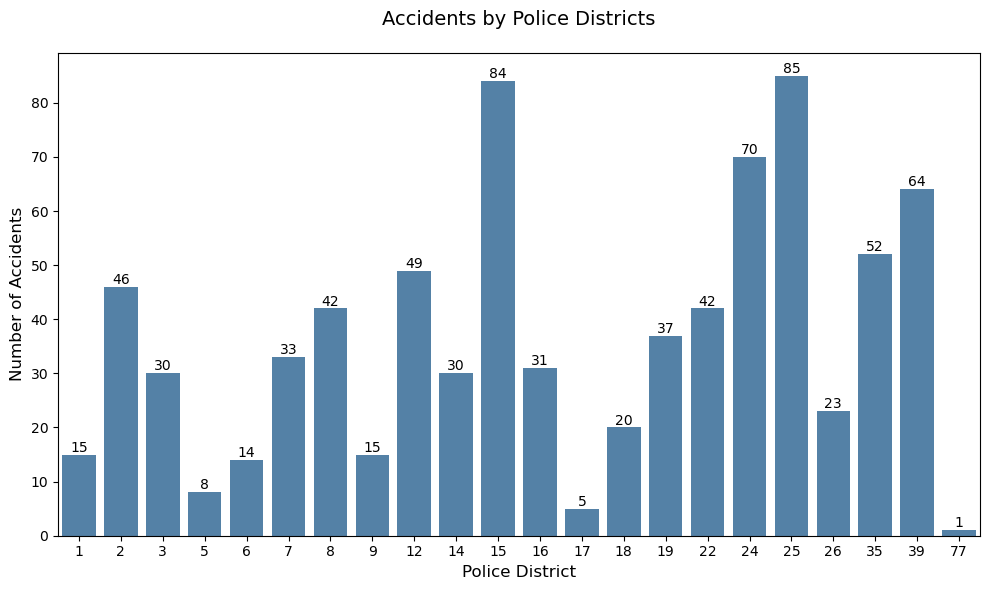

In [24]:
plt.figure(figsize=(10, 6))


bar_plot = sns.barplot(
    data=acc_by_police_dist, x="police_district", y="count", color="steelblue"
)


plt.title("Accidents by Police Districts", fontsize=14, pad=20)
plt.xlabel("Police District", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.xticks()

for p in bar_plot.patches:
    bar_plot.annotate(
        format(p.get_height(), ".0f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 5),
        textcoords="offset points",
        fontsize=10,
    )


plt.tight_layout()
plt.show()

In [25]:
acc_by_day = df["day_name"].value_counts().reset_index().sort_values("day_name")
acc_by_day

,day_name,count
2,Friday,123
4,Monday,101
0,Saturday,143
1,Sunday,133
6,Thursday,90
5,Tuesday,101
3,Wednesday,105


In [26]:
day_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]

acc_by_day = (
    df["day_name"]
    .value_counts()
    .reindex(day_order)
    .reset_index()
    .rename(columns={"index": "day_name", "day_name": "day_name"})
)
acc_by_day

,day_name,count
0,Monday,101
1,Tuesday,101
2,Wednesday,105
3,Thursday,90
4,Friday,123
5,Saturday,143
6,Sunday,133


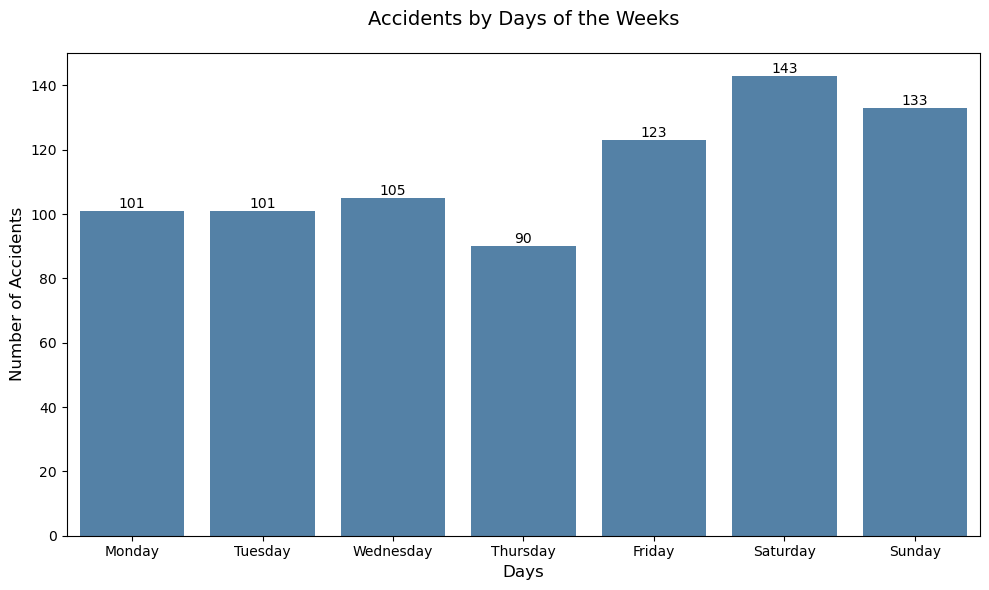

In [27]:
plt.figure(figsize=(10, 6))


bar_plot = sns.barplot(data=acc_by_day, x="day_name", y="count", color="steelblue")


plt.title("Accidents by Days of the Weeks", fontsize=14, pad=20)
plt.xlabel("Days", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.xticks()

for p in bar_plot.patches:
    bar_plot.annotate(
        format(p.get_height(), ".0f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 5),
        textcoords="offset points",
        fontsize=10,
    )


plt.tight_layout()
plt.show()

In [28]:
df["victim_gender"].value_counts()

victim_gender
M     577
F     214
Mn      1
MN      1
f       1
M.      1
Name: count, dtype: int64

In [29]:
gender_mapping = {
    "M": "M",
    "F": "F",
    "MN": "M",
    "M.": "M",
    "Mn": "M",
    "f": "F",
}

df["victim_gender"] = df["victim_gender"].map(gender_mapping)
df["victim_gender"].value_counts()

victim_gender
M    580
F    215
Name: count, dtype: int64

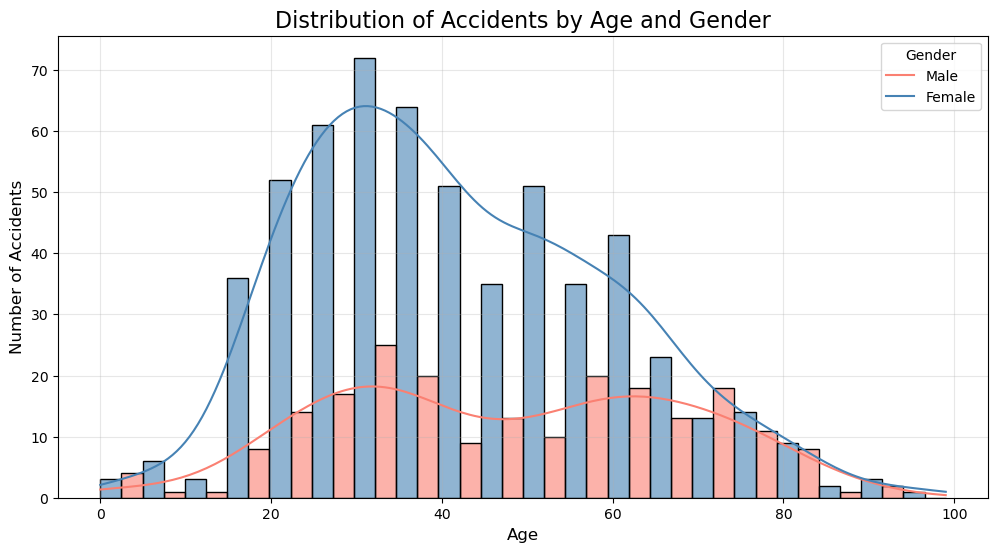

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df,
    x="age",
    hue="victim_gender",
    bins=20,
    kde=True,
    palette={"M": "steelblue", "F": "salmon"},
    alpha=0.6,
    multiple="dodge",  # Try 'dodge' for side-by-side bars
)

plt.title("Distribution of Accidents by Age and Gender", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.legend(title="Gender", labels=["Male", "Female"])
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
df["age_group"] = pd.cut(
    df["age"],
    bins=[0, 18, 25, 35, 45, 55, 65, 75, 100],
    labels=["0-18", "19-25", "26-35", "36-45", "46-55", "56-65", "66-75", "75+"],
)

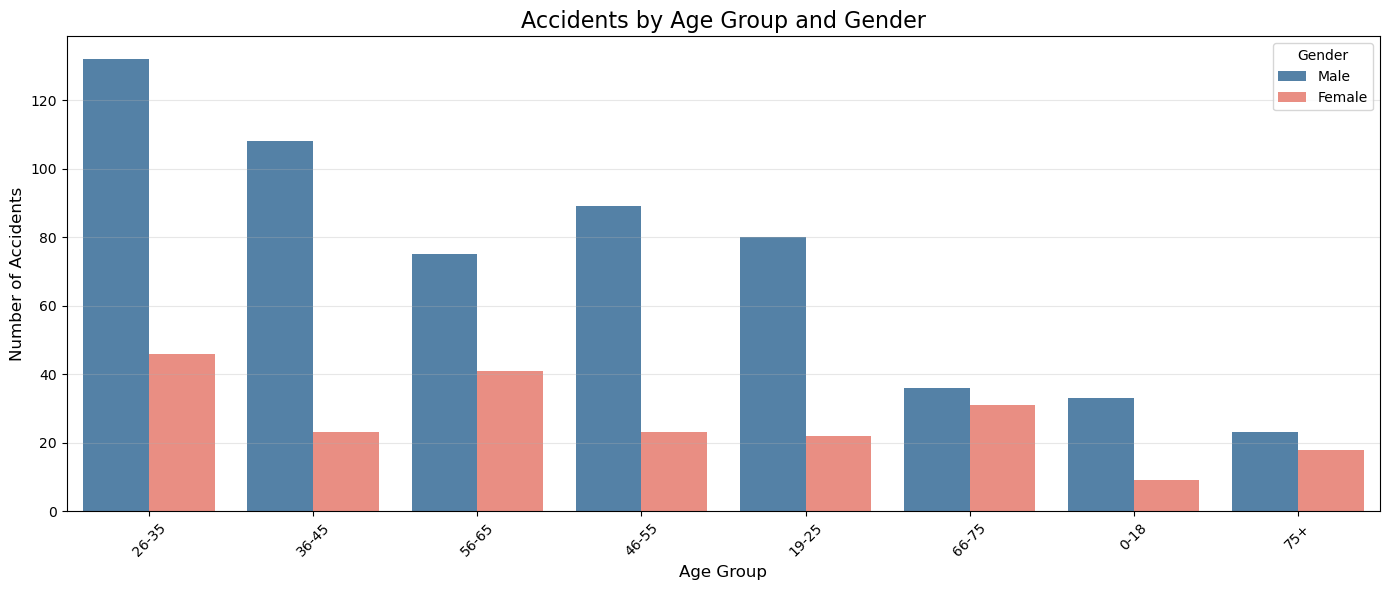

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(
    data=df,
    x="age_group",
    hue="victim_gender",
    palette={"M": "steelblue", "F": "salmon"},
    order=df["age_group"].value_counts().index,
)

plt.title("Accidents by Age Group and Gender", fontsize=16)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.legend(title="Gender", labels=["Male", "Female"])
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis="y")
plt.tight_layout()
plt.show()

In [ ]:
df.to_csv("./philadelphia_fatal_crashes.csv")